In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
file_path = 'vgsales.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


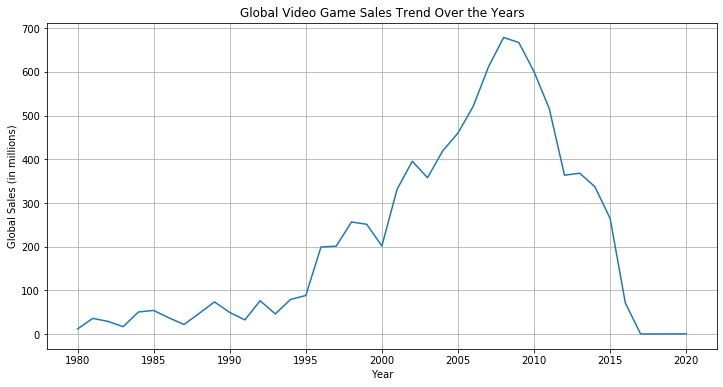

In [3]:
# Preparing the data for analysis

# Filtering out rows with missing 'Year' values
data_filtered = data.dropna(subset=['Year'])

# Grouping the data by year and summing up the global sales
yearly_sales = data_filtered.groupby('Year')['Global_Sales'].sum()

# Plotting the sales trends over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_sales.index, y=yearly_sales.values)
plt.title('Global Video Game Sales Trend Over the Years')
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.grid(True)
plt.show()

The line chart above illustrates the global video game sales trend over the years. Here are some key observations:

* Growth Period: There appears to be a significant growth period in global video game sales starting from the early 1980s, reaching a peak around the mid-2000s.
* Peak Sales: The peak in sales occurs around the mid-2000s, which might correspond to a period of rapid growth in the gaming industry with the introduction of new gaming platforms and technologies.
* Recent Trends: After the peak, there is a noticeable decline in sales. This decline could be attributed to various factors such as market saturation, the rise of mobile gaming, or changes in consumer preferences.
* Fluctuations: There are also several fluctuations in sales over the years, which could be influenced by factors like economic conditions, the release of highly anticipated games, or changes in gaming platform popularity.

This chart provides a historical perspective on the video game industry's growth and shifts over the years, reflecting changing technologies, market dynamics, and consumer tastes.

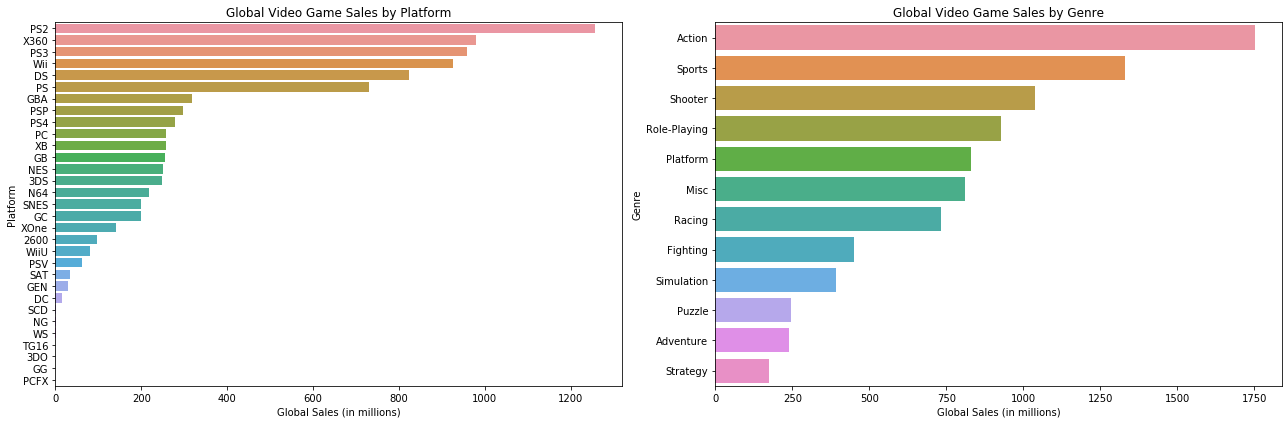

In [4]:
# Analyzing the most popular gaming platforms and genres

# Grouping the data by platform and summing up the global sales
platform_sales = data.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)

# Grouping the data by genre and summing up the global sales
genre_sales = data.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

# Creating subplots for platforms and genres
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Plotting the sales by platform
sns.barplot(x=platform_sales.values, y=platform_sales.index, ax=ax[0])
ax[0].set_title('Global Video Game Sales by Platform')
ax[0].set_xlabel('Global Sales (in millions)')
ax[0].set_ylabel('Platform')

# Plotting the sales by genre
sns.barplot(x=genre_sales.values, y=genre_sales.index, ax=ax[1])
ax[1].set_title('Global Video Game Sales by Genre')
ax[1].set_xlabel('Global Sales (in millions)')
ax[1].set_ylabel('Genre')

plt.tight_layout()
plt.show()


The two bar charts above provide insights into the most popular gaming platforms and genres in terms of global sales:

1. Popular Platforms:
    * The left chart shows the global video game sales aggregated by platform.
    * Certain platforms stand out as having significantly higher sales. These are likely platforms that had a large market share or a long period of popularity.

2. Popular Genres:
    * The right chart displays the global video game sales aggregated by genre.
    * Some genres are evidently more popular than others, which could be due to broader appeal, a larger number of releases in those genres, or a combination of both.

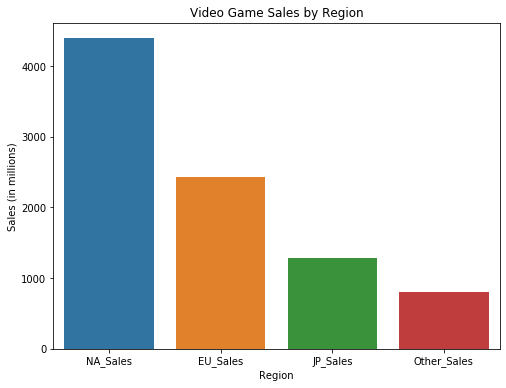

In [5]:
# Analyzing regional differences in video game sales

# Aggregating sales by region
regional_sales = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# Plotting the regional sales data
plt.figure(figsize=(8, 6))
sns.barplot(x=regional_sales.index, y=regional_sales.values)
plt.title('Video Game Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales (in millions)')
plt.show()

The bar chart above illustrates the regional differences in video game sales, with data aggregated for North America (NA), Europe (EU), Japan (JP), and other regions (Other). Key observations include:

1. North America Dominance: North American sales are the highest, indicating a strong market for video games in this region. This might be due to a combination of factors such as high consumer spending power, widespread gaming culture, and the presence of major gaming companies.

2. European Market: Europe follows North America in terms of sales, showcasing its significant role in the global gaming market.

3. Japan's Market: While Japan's sales are lower compared to North America and Europe, it's still a substantial market. Japan's unique gaming culture and the birthplace of many iconic gaming franchises could contribute to its significant share.

4. Other Regions: Sales in other regions are noticeably lower than the three main markets. This could be due to factors like economic differences, varying levels of gaming culture penetration, or distribution challenges.

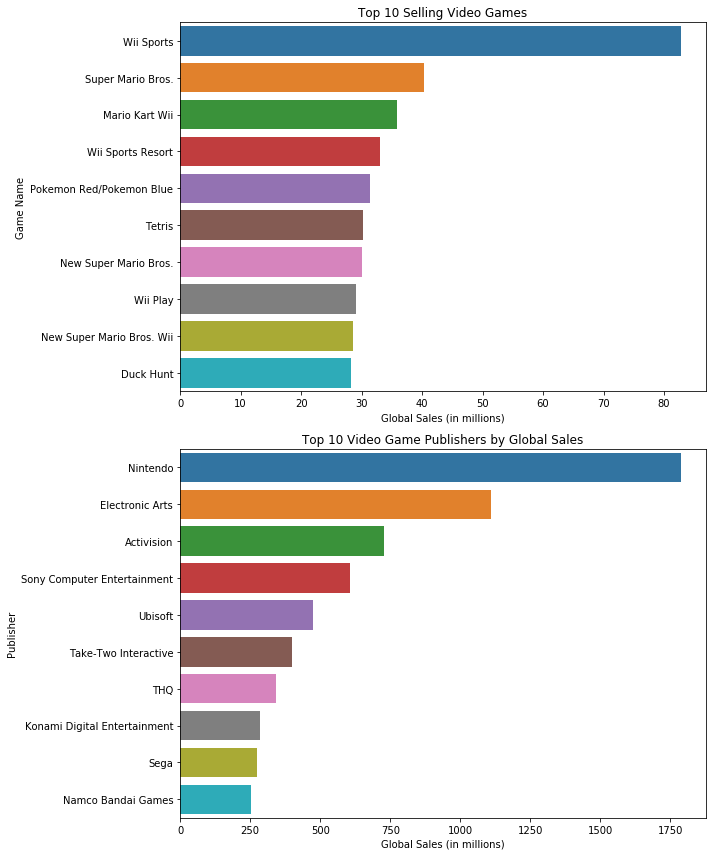

In [6]:
# Analyzing the top-selling games and publishers

# Top 10 selling games
top_games = data[['Name', 'Global_Sales']].sort_values(by='Global_Sales', ascending=False).head(10)

# Top 10 publishers by global sales
top_publishers = data.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10)

# Creating subplots for games and publishers
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# Plotting the top-selling games
sns.barplot(x='Global_Sales', y='Name', data=top_games, ax=ax[0])
ax[0].set_title('Top 10 Selling Video Games')
ax[0].set_xlabel('Global Sales (in millions)')
ax[0].set_ylabel('Game Name')

# Plotting the top publishers by global sales
sns.barplot(x=top_publishers.values, y=top_publishers.index, ax=ax[1])
ax[1].set_title('Top 10 Video Game Publishers by Global Sales')
ax[1].set_xlabel('Global Sales (in millions)')
ax[1].set_ylabel('Publisher')

plt.tight_layout()
plt.show()


The charts above showcase the top-selling video games and publishers based on global sales:

1. Top-Selling Games (Top Chart):
    * This chart lists the top 10 best-selling video games.
    * The games at the top of this list have achieved exceptionally high global sales, indicating their widespread popularity and success.

2. Top Publishers by Global Sales (Bottom Chart):
    * his chart displays the top 10 video game publishers ranked by their total global sales.
    *The leading publishers have likely produced multiple successful titles, contributing to their high sales figures. Their position also reflects their influence and stature in the gaming industry.

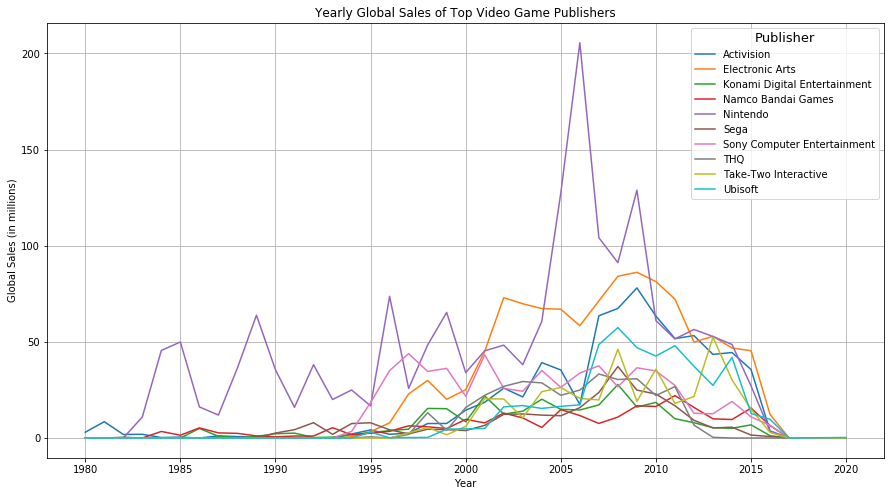

In [7]:
# Selecting the top publishers based on overall global sales
top_publishers_overall = data.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10).index

# Filtering the dataset to include only the top publishers
top_publishers_data = data[data['Publisher'].isin(top_publishers_overall)]

# Grouping the data by year and publisher, and summing up the global sales
yearly_publisher_sales = top_publishers_data.groupby(['Year', 'Publisher'])['Global_Sales'].sum().unstack().fillna(0)

# Plotting the yearly performance of top publishers
plt.figure(figsize=(15, 8))
sns.lineplot(data=yearly_publisher_sales, dashes=False)
plt.title('Yearly Global Sales of Top Video Game Publishers')
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.legend(title='Publisher', title_fontsize='13', fontsize='10')
plt.grid(True)
plt.show()

The line chart above represents the yearly global sales of the top video game publishers over time. Here are some insights from this analysis:

1. Variability in Performance: The chart shows significant variability in the performance of different publishers from year to year. This variability could be influenced by the release of major titles, changes in market preferences, or competition among publishers.
2. Dominance and Decline: Some publishers have periods of clear dominance, indicated by peaks in their sales. These peaks often coincide with the release of highly successful game titles. Conversely, periods of decline or lower sales can be observed, possibly due to less successful releases or shifts in market dynamics.
3. Evolving Market Share: The relative market share of these publishers appears to evolve over time. New entrants might rise to prominence, while established ones may experience fluctuating fortunes.
4. Long-term Trends: While there are yearly fluctuations, observing long-term trends might provide insights into the overall stability and growth of these publishers in the gaming industry.

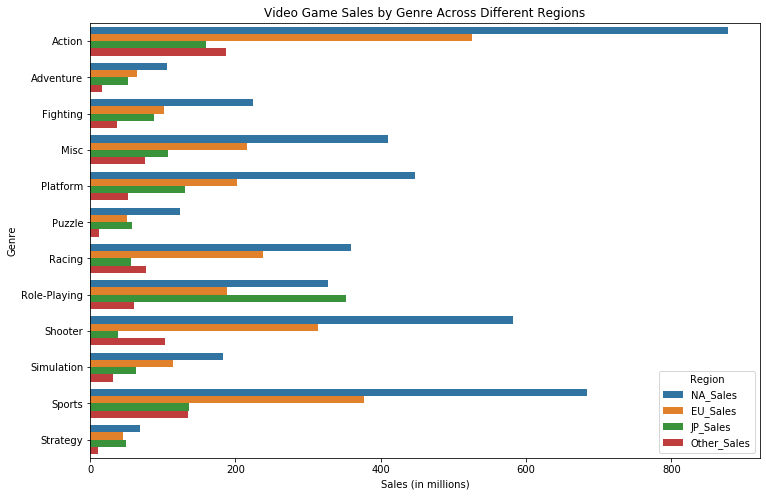

In [17]:
# Analyzing if certain genres are more popular in specific regions

# Grouping the data by genre and region, and summing up the sales
regional_genre_sales = data.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# Melting the data for better visualization
regional_genre_sales_melted = regional_genre_sales.reset_index().melt(id_vars='Genre', var_name='Region', value_name='Sales')

# Plotting the genre popularity across regions
plt.figure(figsize=(12, 8))
sns.barplot(x='Sales', y='Genre', hue='Region', data=regional_genre_sales_melted)
plt.title('Video Game Sales by Genre Across Different Regions')
plt.xlabel('Sales (in millions)')
plt.ylabel('Genre')
plt.legend(title='Region')
plt.show()


The bar chart provides a comparative view of video game sales by genre across different regions, offering insights into regional gaming cultures:

1. Regional Preferences:
    * North America (NA): Shows a strong preference for certain genres, with high sales in categories like Action, Sports, and Shooter.
    * Europe (EU): Similar to North America, Europe also shows high sales in Action, Sports, and Shooter genres, albeit with slightly different proportions.
    * Japan (JP): The Japanese market displays a distinct preference, with genres like Role-Playing standing out more prominently compared to other regions. This reflects the unique gaming culture in Japan.
    * Other Regions: These regions seem to follow a trend similar to North America and Europe, with high sales in Action and Sports genres.

2. Global Trends: Action and Sports genres are consistently popular across all regions, suggesting a global appeal for these types of games.

3. Cultural Influences: The differences in genre popularity can be attributed to cultural preferences, gaming traditions, and market maturity in different regions. For instance, the popularity of Role-Playing games in Japan may be linked to the country's strong tradition of storytelling and fantasy in gaming.

4. Market Dynamics: The chart also reflects the market dynamics and consumer behavior in different regions, which can be influenced by factors like local gaming communities, regional game development trends, and historical preferences.

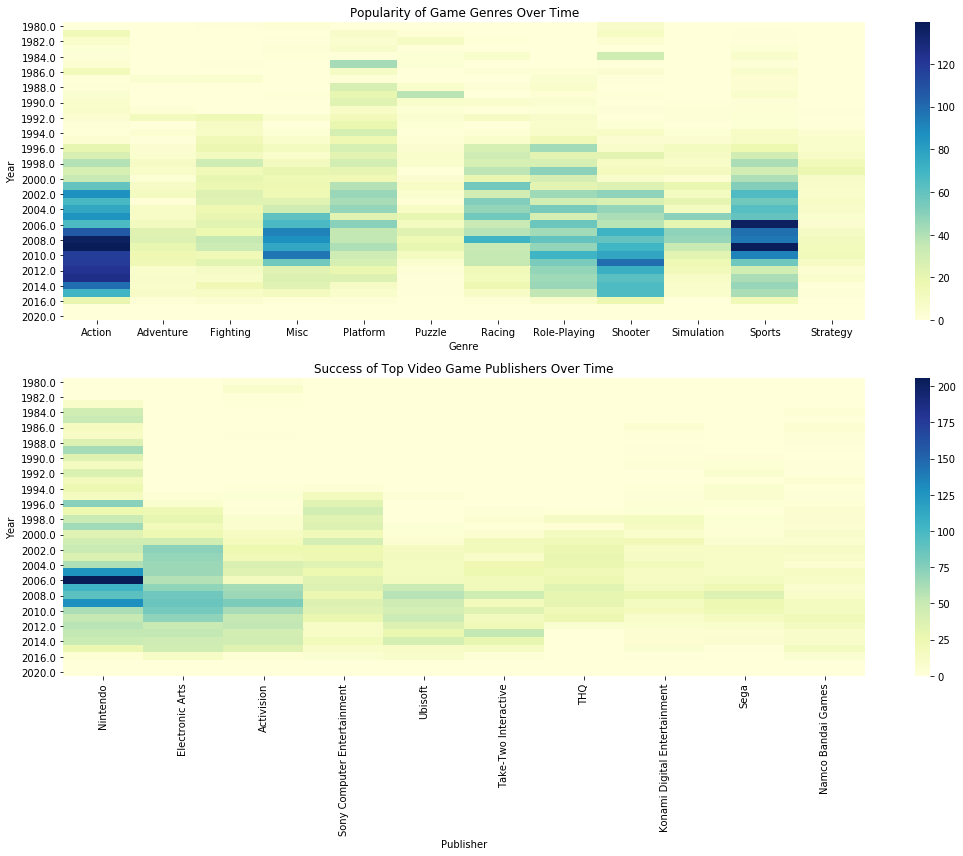

In [18]:
# Analyzing the popularity of different genres over time
genre_yearly_sales = data.groupby(['Year', 'Genre'])['Global_Sales'].sum().unstack().fillna(0)

# Analyzing the success of various publishers over time
publisher_yearly_sales = data.groupby(['Year', 'Publisher'])['Global_Sales'].sum().unstack().fillna(0)

# Selecting the top publishers based on overall global sales for a clearer visualization
top_publishers = data.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10).index
publisher_yearly_sales_top = publisher_yearly_sales[top_publishers]

# Creating subplots for genres and publishers
fig, ax = plt.subplots(2, 1, figsize=(15, 12))

# Plotting the popularity of different genres over time
sns.heatmap(genre_yearly_sales, ax=ax[0], cmap="YlGnBu")
ax[0].set_title('Popularity of Game Genres Over Time')
ax[0].set_xlabel('Genre')
ax[0].set_ylabel('Year')

# Plotting the success of various publishers over time
sns.heatmap(publisher_yearly_sales_top, ax=ax[1], cmap="YlGnBu")
ax[1].set_title('Success of Top Video Game Publishers Over Time')
ax[1].set_xlabel('Publisher')
ax[1].set_ylabel('Year')

plt.tight_layout()
plt.show()


The heatmaps above visualize the evolution of the popularity of different game genres and the success of various publishers over time:

1. Popularity of Game Genres Over Time (Top Chart):
    * This heatmap shows the sales of different genres across years. Darker shades indicate higher sales in that genre for the year.
    * Certain genres show a consistent presence over the years, indicating enduring popularity.
    * There are periods where specific genres surge in popularity, possibly due to the release of influential games or shifts in consumer preferences.

2. Success of Top Video Game Publishers Over Time (Bottom Chart):
    * This heatmap focuses on the top publishers based on overall global sales and their yearly performance.
    * The varying shades represent the sales volume of these publishers in different years. Darker shades suggest higher sales.
    * Some publishers demonstrate consistent success over many years, while others show fluctuating fortunes.
    * The success of publishers may correlate with the release of major titles, expansion into new markets, or other strategic initiatives.

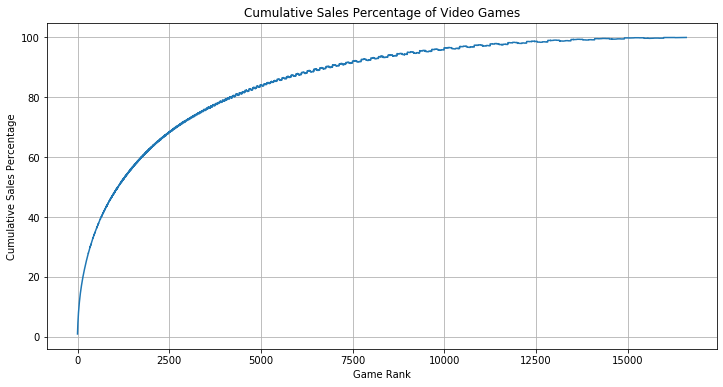

(None, None, 8920.44)

In [11]:
# Result
# Analyzing the distribution of sales among the top games

# Sorting the games by global sales
sorted_games = data[['Name', 'Global_Sales']].sort_values(by='Global_Sales', ascending=False)

# Calculating cumulative sales
sorted_games['Cumulative_Sales'] = sorted_games['Global_Sales'].cumsum()
total_sales = sorted_games['Global_Sales'].sum()
sorted_games['Cumulative_Sales_Percentage'] = (sorted_games['Cumulative_Sales'] / total_sales) * 100

# Plotting the cumulative sales percentage of the top games
plt.figure(figsize=(12, 6))
sns.lineplot(x=sorted_games.index, y='Cumulative_Sales_Percentage', data=sorted_games)
plt.title('Cumulative Sales Percentage of Video Games')
plt.xlabel('Game Rank')
plt.ylabel('Cumulative Sales Percentage')
plt.grid(True)
plt.show()

# Displaying specific values to understand distribution better
sorted_games.head().to_csv("new.csv"), sorted_games.loc[sorted_games['Cumulative_Sales_Percentage'] <= 50].tail().to_csv("new2.csv"), total_sales


The analysis of how sales are distributed among the top video games reveals some interesting patterns:

1. Concentration at the Top: The cumulative sales percentage line chart shows a steep initial curve, indicating that a small number of top-ranking games contribute a significant portion of total sales. For instance, the top 5 games alone account for approximately 2.5% of total global sales, which is notable considering the large number of games in the dataset.
2. Distribution of Sales: As we move down the ranks, the curve flattens, suggesting that the majority of games each contribute a relatively small portion to the total sales. This indicates a long tail in the sales distribution.
3. 50% Sales Mark: To reach 50% of total global sales (which is around 8920.44 million), we need to consider the top 1100 games out of the entire dataset. This further emphasizes that while top games sell exceptionally well, a significant portion of sales is spread across many titles.
4. High Sales Concentration in Few Games: The data confirms that a few games are responsible for a large proportion of sales. However, it's also clear that there is a wide range of games contributing to the overall sales figures, demonstrating the diverse nature of successful games in the market.